## Plot a Maxwell Boltzmann Distribution ##



In [3]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from astropy import constants as const

astropy includes constants - this will make our calculations easier.

In [37]:
help(const)

Help on package astropy.constants in astropy:

NAME
    astropy.constants

DESCRIPTION
    Contains astronomical and physical constants for use in Astropy or other
    places.
    
    A typical use case might be::
    
        >>> from astropy.constants import c, m_e
        >>> # ... define the mass of something you want the rest energy of as m ...
        >>> m = m_e
        >>> E = m * c**2
        >>> E.to('MeV')  # doctest: +FLOAT_CMP
        <Quantity 0.510998927603161 MeV>
    
    The following constants are available:
    
    ========== ============== ================ =========================
       Name        Value            Unit       Description
    ========== ============== ================ =========================
        G       6.67408e-11     m3 / (kg s2)   Gravitational constant
       N_A     6.02214086e+23    1 / (mol)     Avogadro's number
        R        8.3144598      J / (K mol)    Gas constant
       Ryd       10973731.6       1 / (m)      Rydberg consta

In [45]:
amu = 14*2 # diatomic Nitrogen
T = 293 # temp in K
Ntot = 1

In [50]:
m = amu*const.m_p # mass of gas particle
vpeak = np.sqrt(2*const.k_B*T/m)
vrms = np.sqrt(3*const.k_B*T/m)

In [47]:
v = np.linspace(0,3,100)*vpeak
n = Ntot * (m/(2*np.pi*const.k_B*T))**(1.5)*np.exp(-1*m*v**2/(2*const.k_B*T))* 4 * np.pi*v**2

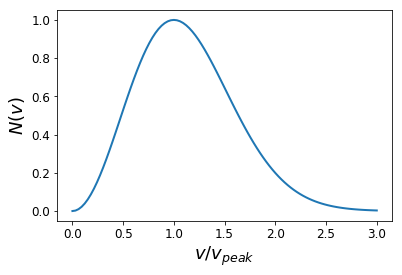

In [57]:
plt.figure()
plt.plot(v/vpeak,n/max(n),lw=2)
plt.xlabel('$v/v_{peak}$',fontsize=18)
plt.ylabel('$N(v)$',fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.subplots_adjust(bottom=.15)

plt.savefig('maxwell-boltzmann.png')

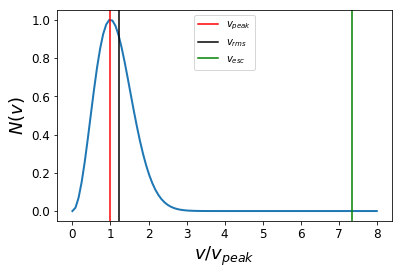

In [62]:
v = np.linspace(0,8,100)*vpeak
n = Ntot * (m/(2*np.pi*const.k_B*T))**(1.5)*np.exp(-1*m*v**2/(2*const.k_B*T))* 4 * np.pi*v**2
plt.figure()
plt.plot(v/vpeak,n/max(n),lw=2)
plt.xlabel('$v/v_{peak}$',fontsize=18)
plt.ylabel('$N(v)$',fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.subplots_adjust(bottom=.15)
plt.axvline(x=vpeak/vpeak,label='$v_{peak}$',color='r')
plt.axvline(x=vrms/vpeak,label='$v_{rms}$',color='k')
plt.axvline(x=6*vrms/vpeak,label='$v_{esc}$',color='g')
plt.legend()
plt.savefig('maxwell-boltzmann-rms.png')